# House pricing prediction for Ames (Iowa, USA) with Machine Learning

This project has the goal to design a awesome machine learning application for the house price prediction in the area of Ames (Iowa, USA).

In [1208]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import plot_roc_curve, classification_report, plot_confusion_matrix, r2_score
import seaborn as sns
from matplotlib.pyplot import figure, gcf
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import pylab 
import statsmodels.api as sm
import scipy.stats as stats

## 1. Data Cleaning and Preparation

###  1.1. Data Screening 

In [952]:
df = pd.read_csv("train.csv")

In [953]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [954]:
df.shape

(1460, 81)

In [955]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [956]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 1.2. Data Cleaning

In [957]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [958]:
df.fillna(0.0, inplace=True)

In [959]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [960]:
def sort_obj(df):
    names = []
    for i in df:
        if str(df[i].dtypes) == str(df["MSZoning"].dtypes):
            names.append(i)
    return names

In [961]:
sort_obj(df)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Check which kind of different objects are in each column

In [962]:
def check_numb_obj(list_obj, df):
    dict_obj = {}
    dict_numb = {}
    for i in df:
        if i in list_obj:
            dict_obj[i] = df[i].unique().tolist()
        elif i == "Id" or i == "SalePrice":   
            pass
        else:
            dict_numb[i]=df[i].unique().tolist()
    return dict_obj, dict_numb
            

In [963]:
check_numb_obj(sort_obj(df), df)

({'MSZoning': ['RL', 'RM', 'C (all)', 'FV', 'RH'],
  'Street': ['Pave', 'Grvl'],
  'Alley': [0.0, 'Grvl', 'Pave'],
  'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
  'LandContour': ['Lvl', 'Bnk', 'Low', 'HLS'],
  'Utilities': ['AllPub', 'NoSeWa'],
  'LotConfig': ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'],
  'LandSlope': ['Gtl', 'Mod', 'Sev'],
  'Neighborhood': ['CollgCr',
   'Veenker',
   'Crawfor',
   'NoRidge',
   'Mitchel',
   'Somerst',
   'NWAmes',
   'OldTown',
   'BrkSide',
   'Sawyer',
   'NridgHt',
   'NAmes',
   'SawyerW',
   'IDOTRR',
   'MeadowV',
   'Edwards',
   'Timber',
   'Gilbert',
   'StoneBr',
   'ClearCr',
   'NPkVill',
   'Blmngtn',
   'BrDale',
   'SWISU',
   'Blueste'],
  'Condition1': ['Norm',
   'Feedr',
   'PosN',
   'Artery',
   'RRAe',
   'RRNn',
   'RRAn',
   'PosA',
   'RRNe'],
  'Condition2': ['Norm',
   'Artery',
   'RRNn',
   'Feedr',
   'PosN',
   'PosA',
   'RRAn',
   'RRAe'],
  'BldgType': ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'],
  'HouseStyle

Observations:
- Unique values: No unusual data, or numbers included in the data.
- "BsmFinSF1+2": Can be delted, because the value of "totalBsmSF" is the summation of both columns.
- "1/2stFlrSF": Can be delted, because the value of "GrLivArea" is the summation of both columns.
- "BsmtFullBath"/"FullBath": Summation to one column and then delete the other two.
- "BsmtHalfBath"/"HalfBath": Summation to one column and then delete the other two., 
- "MoSold", "YrSold", "Id": Can be deleted, because they have no information about the house.
- "GarageCars"/"GarageArea": Delete "GarageCars", because it´s the same like "GarageArea".

In [964]:
df["AllFullBath"] = df["BsmtFullBath"]+df["FullBath"]

In [965]:
df["AllHalfBath"] = df["BsmtHalfBath"]+df["HalfBath"]

In [966]:
df = df.drop(columns=["BsmtFinSF1", "BsmtFinSF2", "1stFlrSF", "2ndFlrSF","MoSold", 
                      "YrSold", "BsmtFullBath", "FullBath", "BsmtHalfBath", "Id", "GarageCars"])



Check how often a value appears in a column.

In [967]:
def value_count(df):
    dit = {}
    for i in df:
        dit[i] = dict(df[i].value_counts())
    return dit

In [968]:
value_count(df)

{'MSSubClass': {20: 536,
  60: 299,
  50: 144,
  120: 87,
  30: 69,
  160: 63,
  70: 60,
  80: 58,
  90: 52,
  190: 30,
  85: 20,
  75: 16,
  45: 12,
  180: 10,
  40: 4},
 'MSZoning': {'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10},
 'LotFrontage': {0.0: 259,
  60.0: 143,
  70.0: 70,
  80.0: 69,
  50.0: 57,
  75.0: 53,
  65.0: 44,
  85.0: 40,
  78.0: 25,
  21.0: 23,
  90.0: 23,
  68.0: 19,
  24.0: 19,
  64.0: 19,
  73.0: 18,
  72.0: 17,
  79.0: 17,
  63.0: 17,
  55.0: 17,
  100.0: 16,
  51.0: 15,
  66.0: 15,
  74.0: 15,
  52.0: 14,
  59.0: 13,
  71.0: 12,
  67.0: 12,
  57.0: 12,
  82.0: 12,
  43.0: 12,
  40.0: 12,
  76.0: 11,
  69.0: 11,
  53.0: 10,
  92.0: 10,
  88.0: 10,
  34.0: 10,
  86.0: 10,
  77.0: 9,
  35.0: 9,
  44.0: 9,
  84.0: 9,
  62.0: 9,
  93.0: 8,
  61.0: 8,
  98.0: 8,
  96.0: 8,
  107.0: 7,
  95.0: 7,
  120.0: 7,
  58.0: 7,
  41.0: 6,
  105.0: 6,
  54.0: 6,
  94.0: 6,
  48.0: 6,
  110.0: 6,
  30.0: 6,
  89.0: 6,
  81.0: 6,
  91.0: 6,
  36.0: 6,
  47.0: 5,
  83

Here is a list of a data anomlies: 

- "Neighborhood", "NAmes" values: Looks like an error, but stands for "North Ames".

- "Utilities", {'AllPub': 1459, 'NoSeWa': 1}: Just one house has no utilities. That means that this column gain no information for our ML modell.

- "GarageYrBlt", zero values: The bulit of a garage can´t be zero. This is a data error. The zero values will be replaced with the building year of the house.

In [969]:
df = df.drop(columns=["Utilities"])

In [970]:
df["GarageYrBlt"] = df["GarageYrBlt"].where(df.GarageYrBlt != 0.0, df.YearBuilt)

All columns with more then 40% zeroshare will be removed.

In [971]:
def remove_columns_null(value_count, df):
    limit = df.shape
    limit = limit[0]*0.4
    for i in value_count:
        for j in value_count[i]: 
            if ((j == 0 or j == 0.0) and value_count[i][j]) >= limit:
                df = df.drop(columns=[i])
    return df

In [972]:
df = remove_columns_null(value_count(df), df)

Check if there are duplicates. Because there are alot columns to check it is necessary to print a list.

In [1239]:
def check_duplication(df):
    count = 0
    list_dulicate = []
    for i in list(df.duplicated()):
        if i == True:
            list_dulicate.append(count)
            count += 1
        else:
            count += 1
    if len(list_dulicate) > 0:       
        print("There is a dulication with the Id: " + str(list_dulicate))  
    else:
        print("There are are no dulications in the dataframe")  
    return None

In [1240]:
check_duplication(df)

There are are no dulications in the dataframe


Convert all columns with string values to numeric values.

In [974]:
def string_to_numb(sort_obj, df):
    for i in sort_obj:
        df[i] = pd.factorize(df[i])[0]
    return df                

In [975]:
string_to_numb(sort_obj(df), df).head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice,AllFullBath
0,60,0,65.0,8450,0,0,0,0,0,0,...,2003.0,0,548,0,0,0,0,0,208500,3
1,20,0,80.0,9600,0,0,0,1,0,1,...,1976.0,0,460,0,0,0,0,0,181500,2
2,60,0,68.0,11250,0,1,0,0,0,0,...,2001.0,0,608,0,0,0,0,0,223500,3
3,70,0,60.0,9550,0,1,0,2,0,2,...,1998.0,1,642,0,0,0,0,1,140000,2
4,60,0,84.0,14260,0,1,0,1,0,3,...,2000.0,0,836,0,0,0,0,0,250000,3


### 1.X Analysing the data correlations

In [977]:
corr=df.corr()

Just select the features with the biggest correlation with the target varible 

In [978]:
relevant_features = corr[corr["SalePrice"]>=0.4]

In [979]:
def reduce_columns_relevant_features(df):
    for column in df:
        if not 1 in df[column].unique():
            df = df.drop([column], axis=1)
    return df


In [980]:
relevant_features = reduce_columns_relevant_features(relevant_features)

In [981]:
relevant_features.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,SalePrice,AllFullBath
OverallQual,1.000000,0.572323,0.550684,0.537808,0.593007,0.427452,0.555022,0.562022,0.790982,0.493116
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.199010,0.095589,0.845141,0.478954,0.522897,0.485386
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.287389,0.191740,0.604353,0.371600,0.507101,0.415099
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.454868,0.285573,0.345936,0.486665,0.613581,0.461489
GrLivArea,0.593007,0.199010,0.287389,0.454868,1.000000,0.825489,0.235387,0.468997,0.708624,0.498821


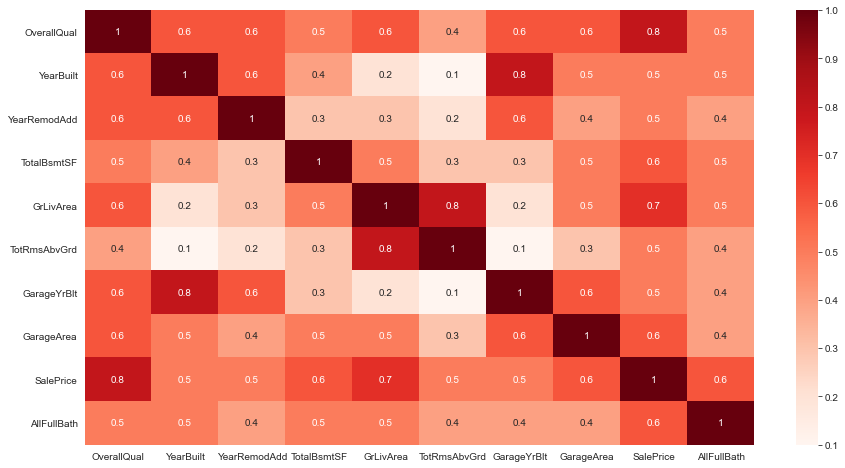

In [982]:
plt.figure(figsize=(15,8))
sns.heatmap(round(relevant_features, 1), annot=True, cmap=plt.cm.Reds)
plt.show()

In [983]:
df1 = df[list(relevant_features.columns)]

### 1.X Analysing the data on outliers

The goal here is to find the values which are furthest way from the rest of the data points. 
Outlier detection is just with continuous variable possible.

In [984]:
def selecting_con_variable(df):
    for i in df:
        if len(df1[i].unique())< 20:
            df = df.drop(i, axis=1)
    return df

In [985]:
df2 = selecting_con_variable(df1)

In [986]:
df2.head()

,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageYrBlt,GarageArea,SalePrice
0,2003,2003,856,1710,2003.0,548,208500
1,1976,1976,1262,1262,1976.0,460,181500
2,2001,2002,920,1786,2001.0,608,223500
3,1915,1970,756,1717,1998.0,642,140000
4,2000,2000,1145,2198,2000.0,836,250000


In [1266]:
def plot_relations(df):
    for i in df:
        print("Feature: " +i)
        plt.scatter(df[i], df["SalePrice"], alpha = 0.4)
        plt.grid(alpha = 0.3)
        plt.show()
    return None

Feature: YearBuilt


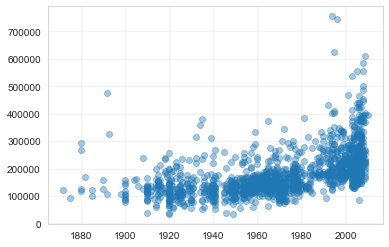

Feature: YearRemodAdd


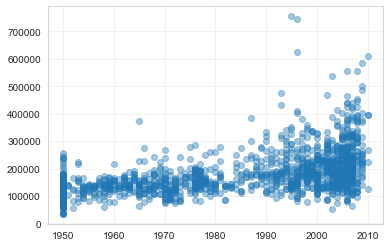

Feature: TotalBsmtSF


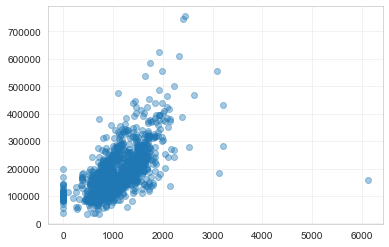

Feature: GrLivArea


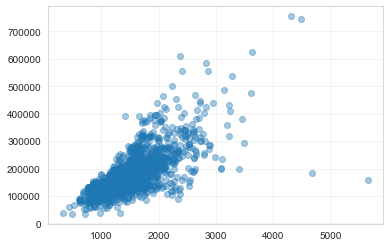

Feature: GarageYrBlt


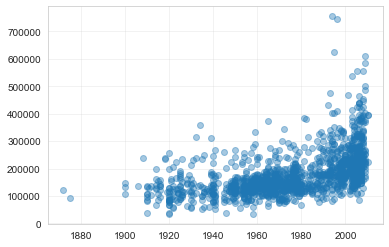

Feature: GarageArea


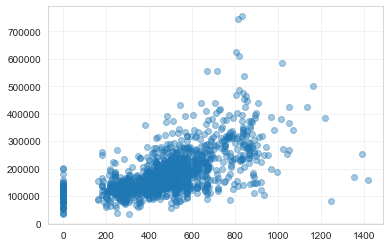

Feature: SalePrice


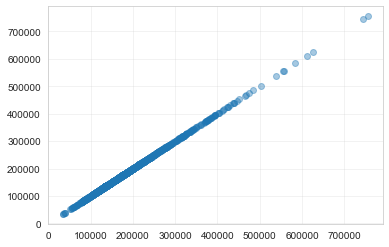

In [1267]:
plot_relations(df2)


In the diagramms shows that there are outliers in almost each feature and also in the target variable.

The next step is to identify the outliers. Because most of the data is not a normal distribution (see the next histogramms) there is the need to you unsupervised clustering. 


In [989]:
def histo_df(df):
    for i in df:
        print("Feature: " + i)
        sns.histplot(data=df, x=i, kde= True)
        sns.set_style("whitegrid")
        plt.show()
    return None 

Feature: YearBuilt


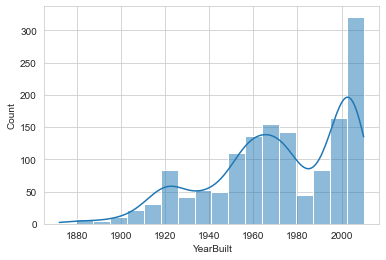

Feature: YearRemodAdd


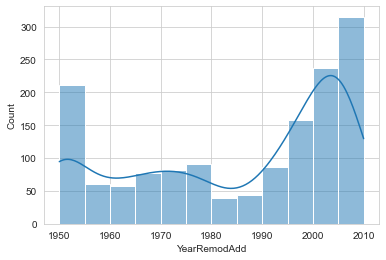

Feature: TotalBsmtSF


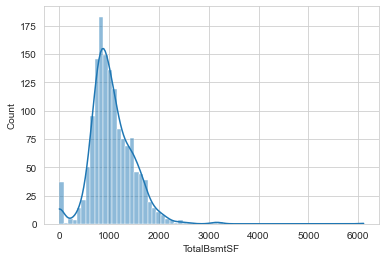

Feature: GrLivArea


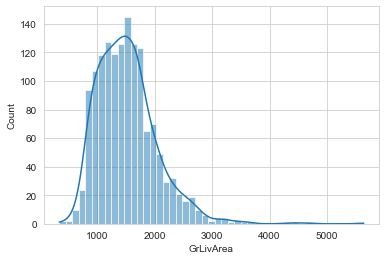

Feature: GarageYrBlt


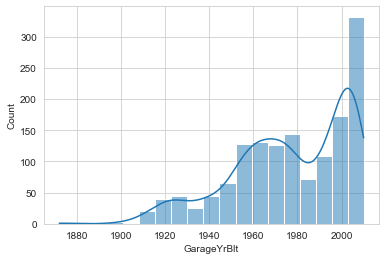

Feature: GarageArea


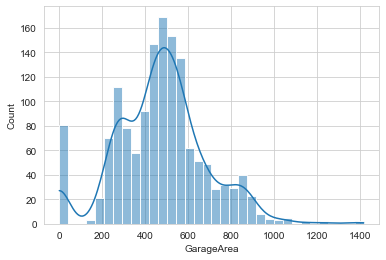

Feature: SalePrice


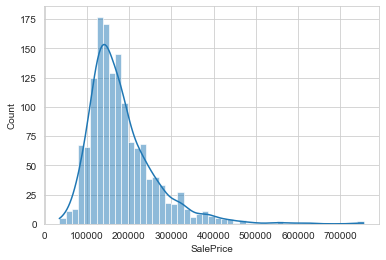

In [990]:
histo_df(df2)

In [991]:
column_names = list(df2.columns)

In [992]:
column_names

['YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'SalePrice']

It makes sense all values to scale before applying a outlier detecting algorithm. The reason therefore is that the hyperparameter will be set the same for all columns. The different scaling can result different results.

In [1147]:
scaler = MinMaxScaler()
scaler.fit(df2)
df3 = pd.DataFrame(scaler.transform(df2))

In [1148]:
def rename_df(df, column_names):
    count = 0
    for i in df:
        df = df.rename({i: column_names[count]}, axis=1)
        count += 1
    return df

In [1149]:
df3 = rename_df(df3, column_names)

In [1150]:
df3.describe()

,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,GarageYrBlt,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.719332,0.581096,0.173065,0.222582,0.757301,0.333554,0.202779
std,0.218862,0.344090,0.071801,0.098998,0.190629,0.150779,0.110321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.594203,0.283333,0.130237,0.149868,0.630435,0.235896,0.132030
50%,0.731884,0.733333,0.162275,0.212886,0.768116,0.338505,0.177892
75%,0.927536,0.900000,0.212480,0.271807,0.934783,0.406206,0.248715
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1151]:
nbrs = NearestNeighbors(n_neighbors = 5)

In [1152]:
def show_outlier1(df):
    for i in df:
        combo = list(map(list, zip(df[i], df["SalePrice"])))
        nbrs.fit(combo)
        distances, indexes = nbrs.kneighbors(combo)
        outlier_index = np.where(distances.mean(axis = 1) > 0.15)
        outlier_values = df.iloc[outlier_index]
        plt.scatter(df[i], df["SalePrice"], color = "b", s = 65)
        plt.scatter(outlier_values[i], outlier_values["SalePrice"], color = "r")
        print("Feature: " + i)
        plt.show()
    return None

Feature: YearBuilt


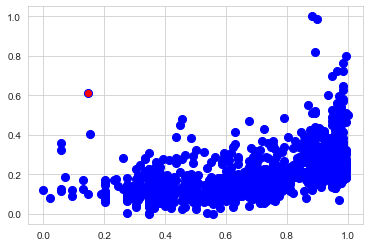

Feature: YearRemodAdd


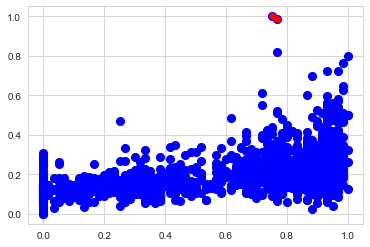

Feature: TotalBsmtSF


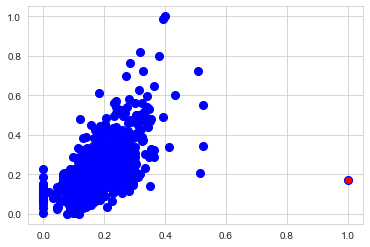

Feature: GrLivArea


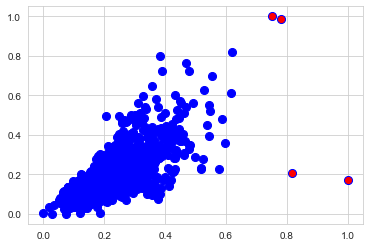

Feature: GarageYrBlt


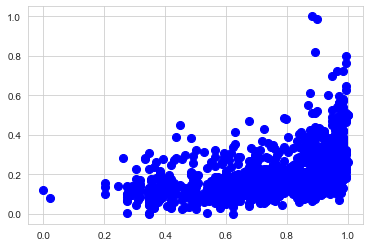

Feature: GarageArea


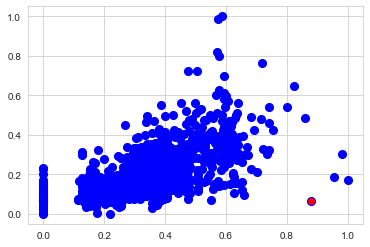

Feature: SalePrice


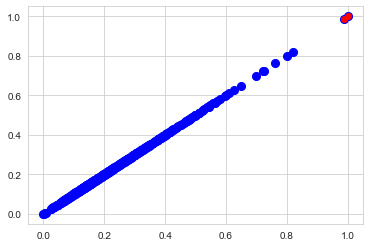

In [1153]:
show_outlier1(df3)

Diverse parameters (k,min distance) have shown, that the KNN alogrithm is not ideal to detect outliers. Let´s try the DBSCAN algorthim.

In [1167]:
def show_outlier2(df):
    outliers = []
    for i in df:
        combo = list(map(list, zip(df[i], df["SalePrice"])))
        model = DBSCAN(eps = 0.12, min_samples = 15).fit(combo)
        colors = model.labels_
        plt.scatter(df[i], df["SalePrice"], c = colors, alpha= 0.5)
        print("Feature: " + i) 
        plt.show()
        outliers.append(list(model.labels_ == -1))
    return outliers

Feature: YearBuilt


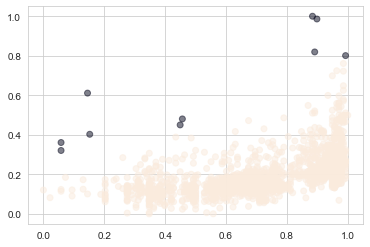

Feature: YearRemodAdd


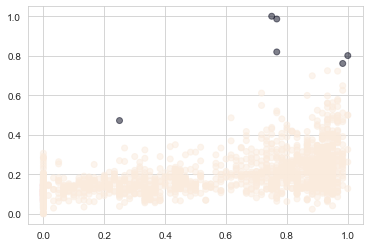

Feature: TotalBsmtSF


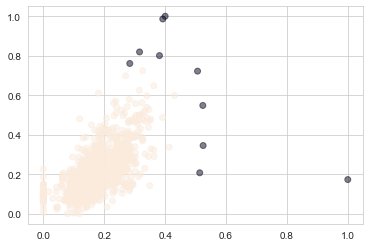

Feature: GrLivArea


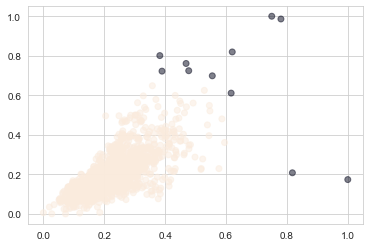

Feature: GarageYrBlt


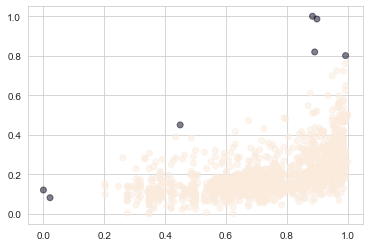

Feature: GarageArea


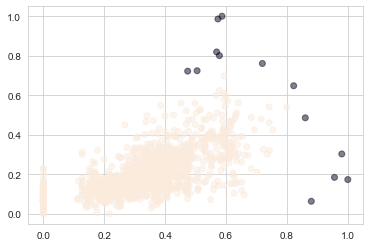

Feature: SalePrice


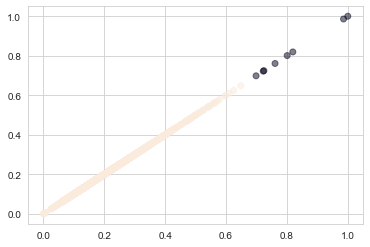

In [1168]:
index_outlier = show_outlier2(df3)

With a trial and error method it is possible to find the sweet spot for the biggest outlier in all columns. It makes sense to go safe an start with conservative approach. This outlier detection is a hyperparameter for the finale modell. If the model performance is not satisfying then this is one place to tune. 

In [1197]:
def drop_outlier(df, column_names, index_outlier):
    df1 = df.reset_index()
    df1 = df1.drop(columns=["index"])
    count = 0  
    count2 = 0
    for i in index_outlier[0]:
        if i == True:
            df1.drop(count, axis=0, inplace= True)
        else:
            for j in range(len(index_outlier)):
                if index_outlier[j][count] == True:
                    count2 += 1
            if count2 > 0:
                df1.drop(count, axis=0, inplace= True)
            count2 = 0
        count += 1
    return df1        

In [1198]:
df4 = drop_outlier(df3, column_names, index_outlier)

Feature: YearBuilt


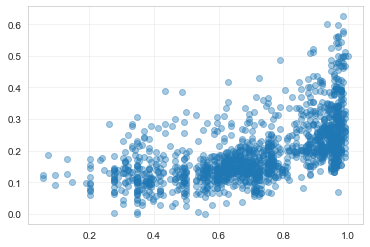

Feature: YearRemodAdd


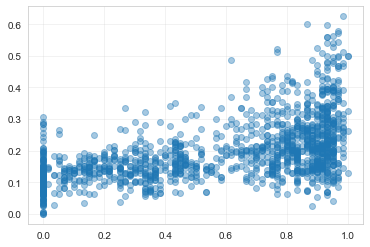

Feature: TotalBsmtSF


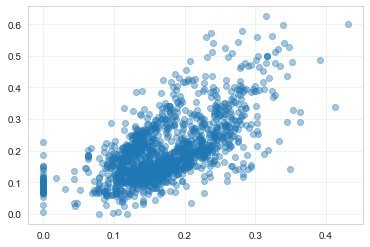

Feature: GrLivArea


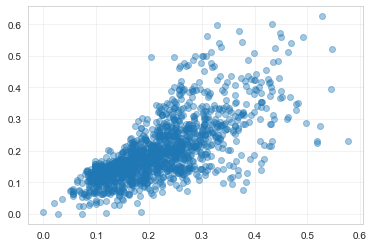

Feature: GarageYrBlt


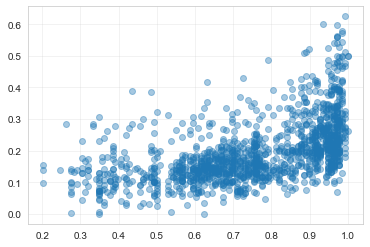

Feature: GarageArea


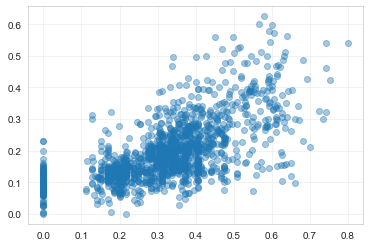

Feature: SalePrice


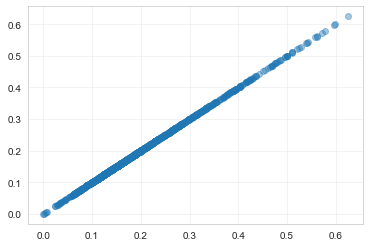

In [1268]:
plot_relations(df4)

The data is now much cleaner compared with the previous data.

The next step is do check if it is possible to convert the data more to a gaussian distribution, because the regression model performance is better with this kind of distrubtion.

At first we visual the features with the Normal probability plot. The distribution should closely follow the diagonal that represents the normal distribution.

In [1298]:
def polt_q(df):
    for i in df:
        print("Feature: " + i)
        stats.probplot(df[i], dist="norm", plot=plt)
        plt.show()
    return None

feature: YearBuilt


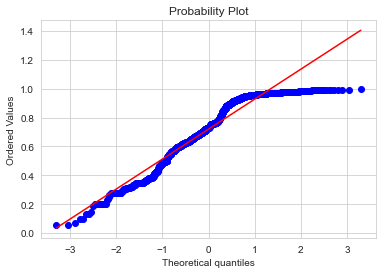

feature: YearRemodAdd


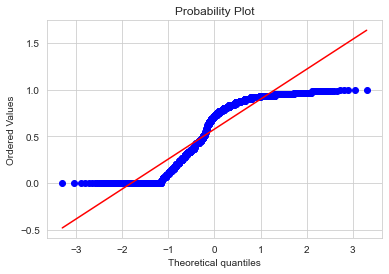

feature: TotalBsmtSF


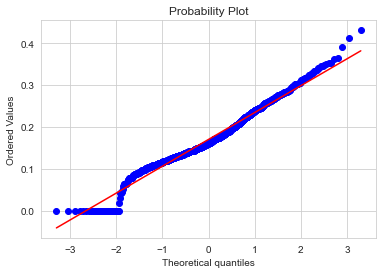

feature: GrLivArea


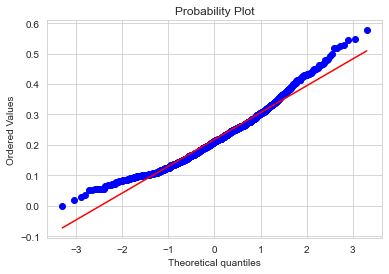

feature: GarageYrBlt


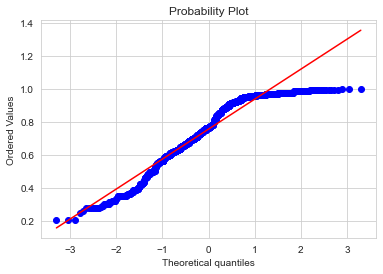

feature: GarageArea


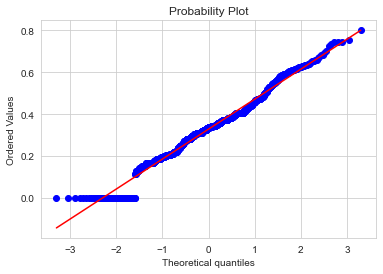

feature: SalePrice


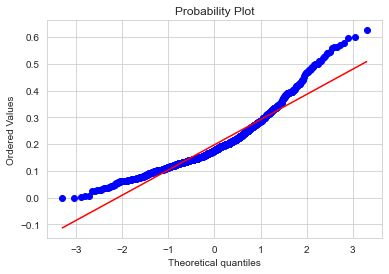

In [1299]:
polt_q(df4)

It is now clear that almost every feature doesn´t follow an normal distrubtion. The normalization before the outliner detection didn´t helped to solve this problem. Now the next step is  to find the best tranformation strategy to convert the data to a normal distrubtion. There are 4 different popular methods therefore:
- Logarithmic Transformation
- Reciprocal Transformation
- Square Root Transformation
- Exponential Transformation

At the beginning the first normalaization should be transformed back to the original values.

In [1226]:
df5 = pd.DataFrame(scaler.inverse_transform(df4))

In [1415]:
df5 = rename_df(df5, column_names)

In [1645]:
def plot_transform_methods(df):
    names_methods=["Logarithmic Transformation","Reciprocal Transformation","Square Root Transformation",
                   "Exponential Transformation"]
    for i in df:
        list_of_num = [[]] * 4
        for j in df[i]:
            if j != 0:
                list_of_num[0] = list_of_num[0] + [np.log(j)]
                list_of_num[1] = list_of_num[1] + [1/j]
                list_of_num[2] = list_of_num[2] + [np.sqrt(j)]
                list_of_num[3] = list_of_num[3] + [j**(1/1.2)]
            else:
                pass
        print("-------------------------------------------------")
        print("Feature: " + i)
        for k in range(len(list_of_num)):
            print("Method: " + names_methods[k])
            stats.probplot(list_of_num[k], dist="norm", plot=plt)
            plt.show()
    return None

-------------------------------------------------
Feature: YearBuilt
Method: Logarithmic Transformation


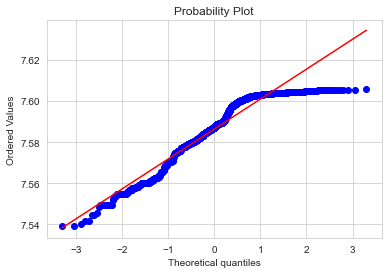

Method: Reciprocal Transformation


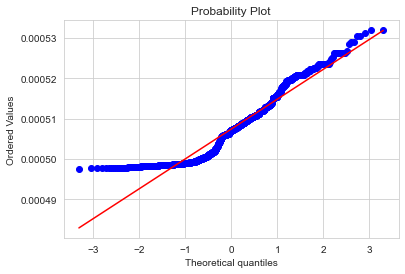

Method: Square Root Transformation


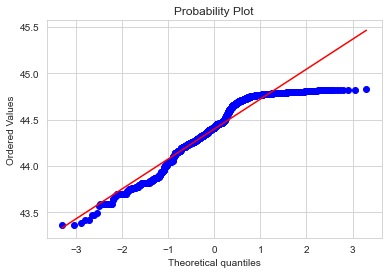

Method: Exponential Transformation


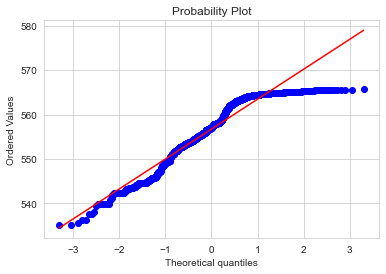

-------------------------------------------------
Feature: YearRemodAdd
Method: Logarithmic Transformation


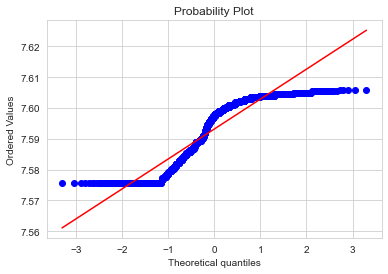

Method: Reciprocal Transformation


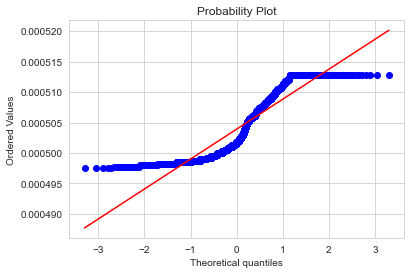

Method: Square Root Transformation


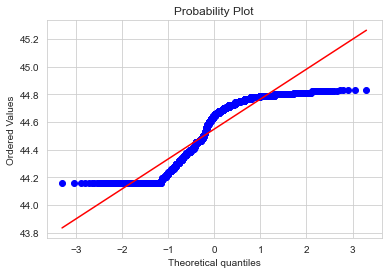

Method: Exponential Transformation


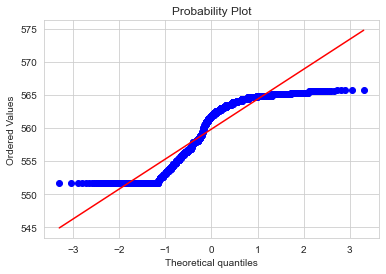

-------------------------------------------------
Feature: TotalBsmtSF
Method: Logarithmic Transformation


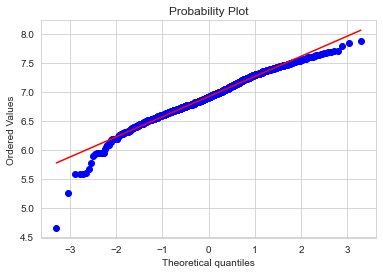

Method: Reciprocal Transformation


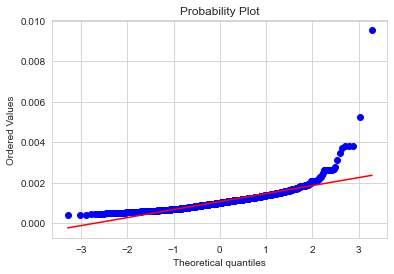

Method: Square Root Transformation


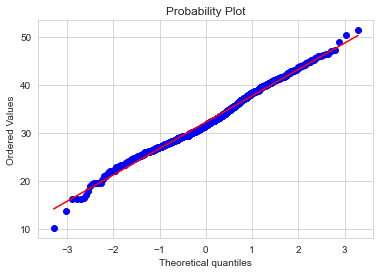

Method: Exponential Transformation


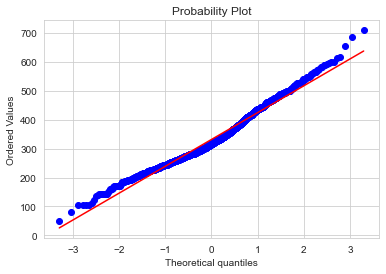

-------------------------------------------------
Feature: GrLivArea
Method: Logarithmic Transformation


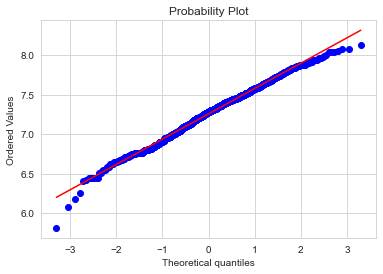

Method: Reciprocal Transformation


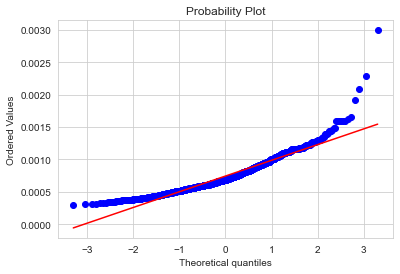

Method: Square Root Transformation


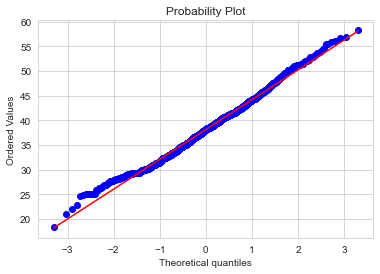

Method: Exponential Transformation


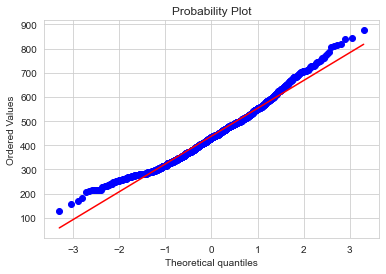

-------------------------------------------------
Feature: GarageYrBlt
Method: Logarithmic Transformation


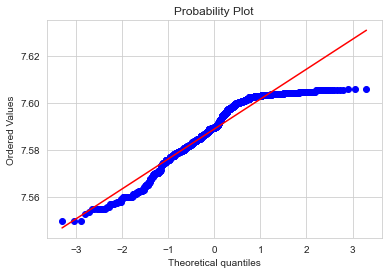

Method: Reciprocal Transformation


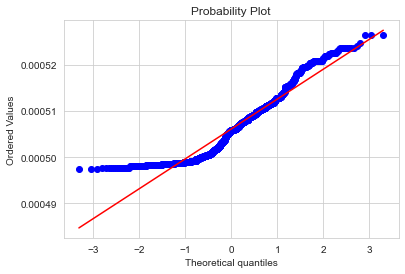

Method: Square Root Transformation


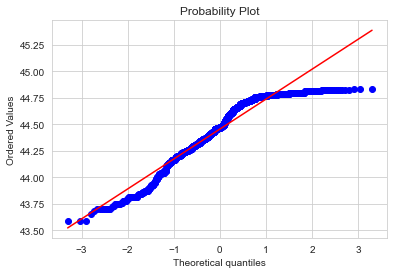

Method: Exponential Transformation


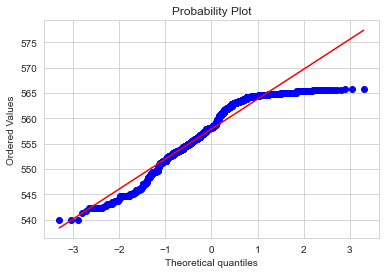

-------------------------------------------------
Feature: GarageArea
Method: Logarithmic Transformation


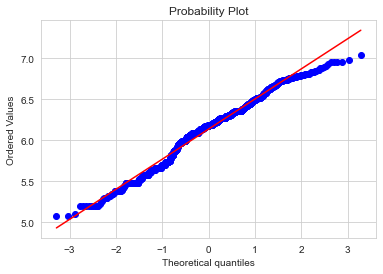

Method: Reciprocal Transformation


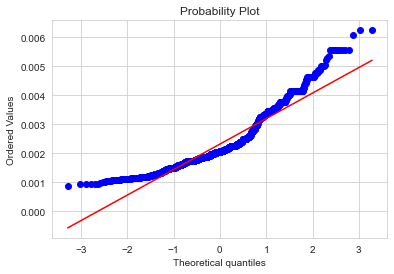

Method: Square Root Transformation


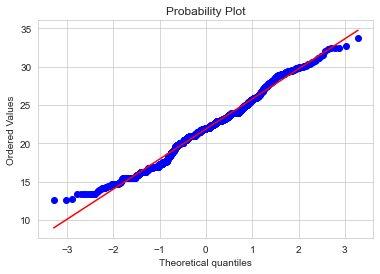

Method: Exponential Transformation


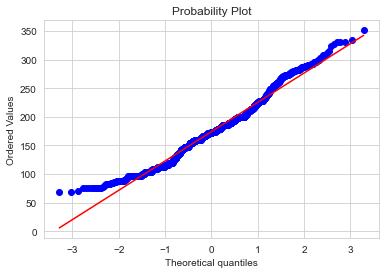

-------------------------------------------------
Feature: SalePrice
Method: Logarithmic Transformation


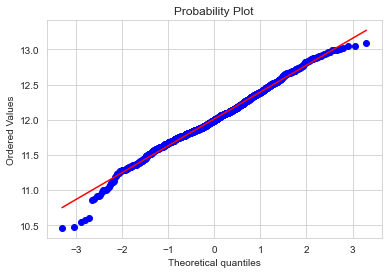

Method: Reciprocal Transformation


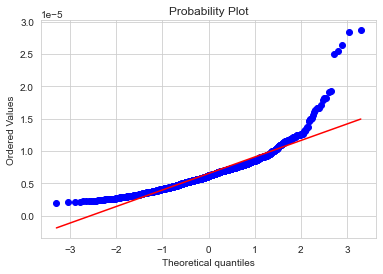

Method: Square Root Transformation


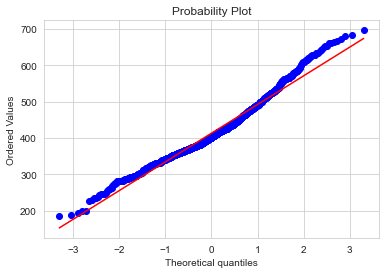

Method: Exponential Transformation


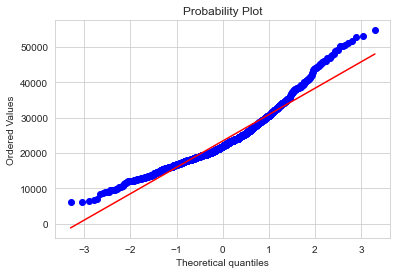

In [1646]:
plot_transform_methods(df5)

Oberservations:
- "YearBuilt", "YearRemodAdd", "GarageYrBlt", "GarageArea" = no impact 
- "TotalBsmtSF" = the Logarithmic Transformation did a little improvement 
- "GrLivArea" = the Square Root Transformation did a good improvement
- "SalePrice" = the Logarithmic Transformation did a good improvement

Now the best transformations will be applied

In [ ]:
def transformation(df):
    trans = {"log": ["SalePrice", "TotalBsmtSF"], "sqrt": ["GrLivArea"]}
    for i in df:
        if i in trans["log"]:
            for j in df[i]:
                if j != 0:
                    
            df[i] = 
            